<AxesSubplot:>

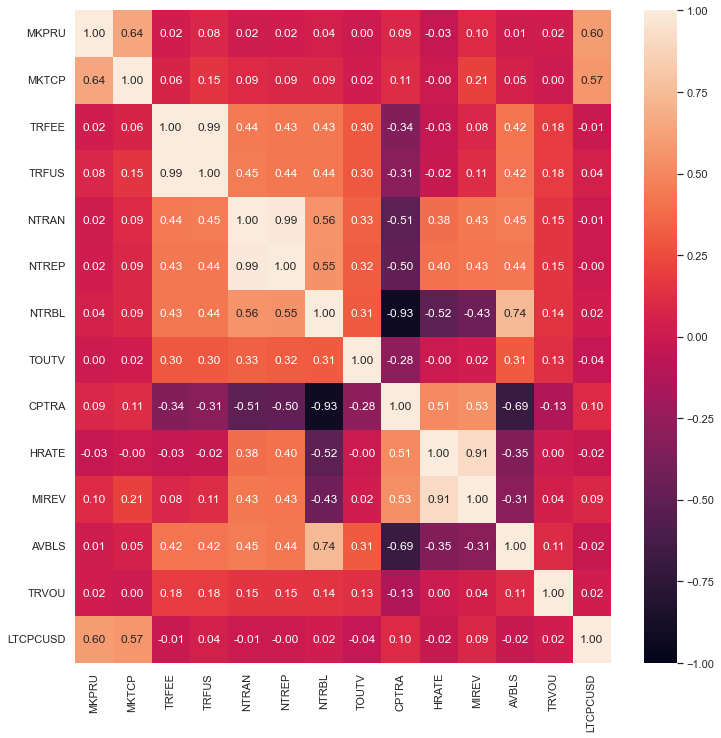

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

table = pd.read_csv('cmb1.csv') # read the csv
f = plt.figure(figsize=(12, 12))
sb.heatmap(table.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [2]:
#mktcap as predictor
#mktpru P/N/Z as response

y = pd.DataFrame(table["MKPRUPNZ"])
#X = pd.DataFrame(table[["MKTCP"]]) # one var
X = pd.DataFrame(table[["MKTCP","LTCPCUSD"]]) # two var
#X = pd.DataFrame(table[["MKTCP","CPTRA","TRFUS","MIREV"]])
#X = pd.DataFrame(table[["MKTCP","TRFUS"]])
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=277843) # 80:20 ratio
#4317 0.76
#

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1321, 1) (1321, 2)
Test Set  : (331, 1) (331, 2)


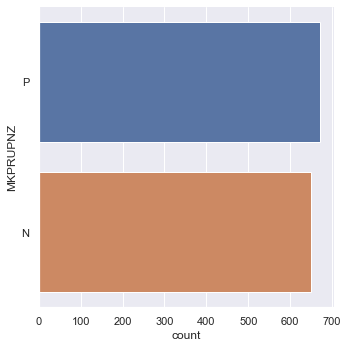

In [3]:
sb.catplot(y = "MKPRUPNZ", data = y_train, kind = "count")

In [4]:
y_train["MKPRUPNZ"].value_counts()


P    672
N    649
Name: MKPRUPNZ, dtype: int64

In [5]:
y_train["MKPRUPNZ"].value_counts()['P'] - y_train["MKPRUPNZ"].value_counts()['N'] # difference

23

In [6]:
y.value_counts()

MKPRUPNZ
P           887
N           765
dtype: int64

In [7]:
X_train.describe()

,MKTCP,LTCPCUSD
count,1321.000000,1321.000000
mean,0.000510,0.000012
std,0.038329,0.061394
min,-0.253873,-0.385400
25%,-0.016592,-0.029400
50%,0.001152,-0.002100
75%,0.018089,0.027400
max,0.156057,0.610600


sb.catplot(y = "MKPRUPNZ", data = y_train, kind = "count")

[Text(1339.2, 2348.3520000000003, 'LTCPCUSD <= -0.002\ngini = 0.5\nsamples = 1321\nvalue = [649, 672]\nclass = P'),
 Text(669.6, 1826.496, 'MKTCP <= 0.003\ngini = 0.375\nsamples = 671\nvalue = [503, 168]\nclass = N'),
 Text(334.8, 1304.6400000000003, 'LTCPCUSD <= -0.014\ngini = 0.253\nsamples = 471\nvalue = [401, 70]\nclass = N'),
 Text(167.4, 782.7840000000001, 'MKTCP <= -0.003\ngini = 0.197\nsamples = 370\nvalue = [329, 41]\nclass = N'),
 Text(83.7, 260.92800000000034, 'gini = 0.216\nsamples = 333\nvalue = [292, 41]\nclass = N'),
 Text(251.10000000000002, 260.92800000000034, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]\nclass = N'),
 Text(502.20000000000005, 782.7840000000001, 'MKTCP <= -0.007\ngini = 0.409\nsamples = 101\nvalue = [72, 29]\nclass = N'),
 Text(418.5, 260.92800000000034, 'gini = 0.306\nsamples = 53\nvalue = [43, 10]\nclass = N'),
 Text(585.9, 260.92800000000034, 'gini = 0.478\nsamples = 48\nvalue = [29, 19]\nclass = N'),
 Text(1004.4000000000001, 1304.6400000000003, 'LTC

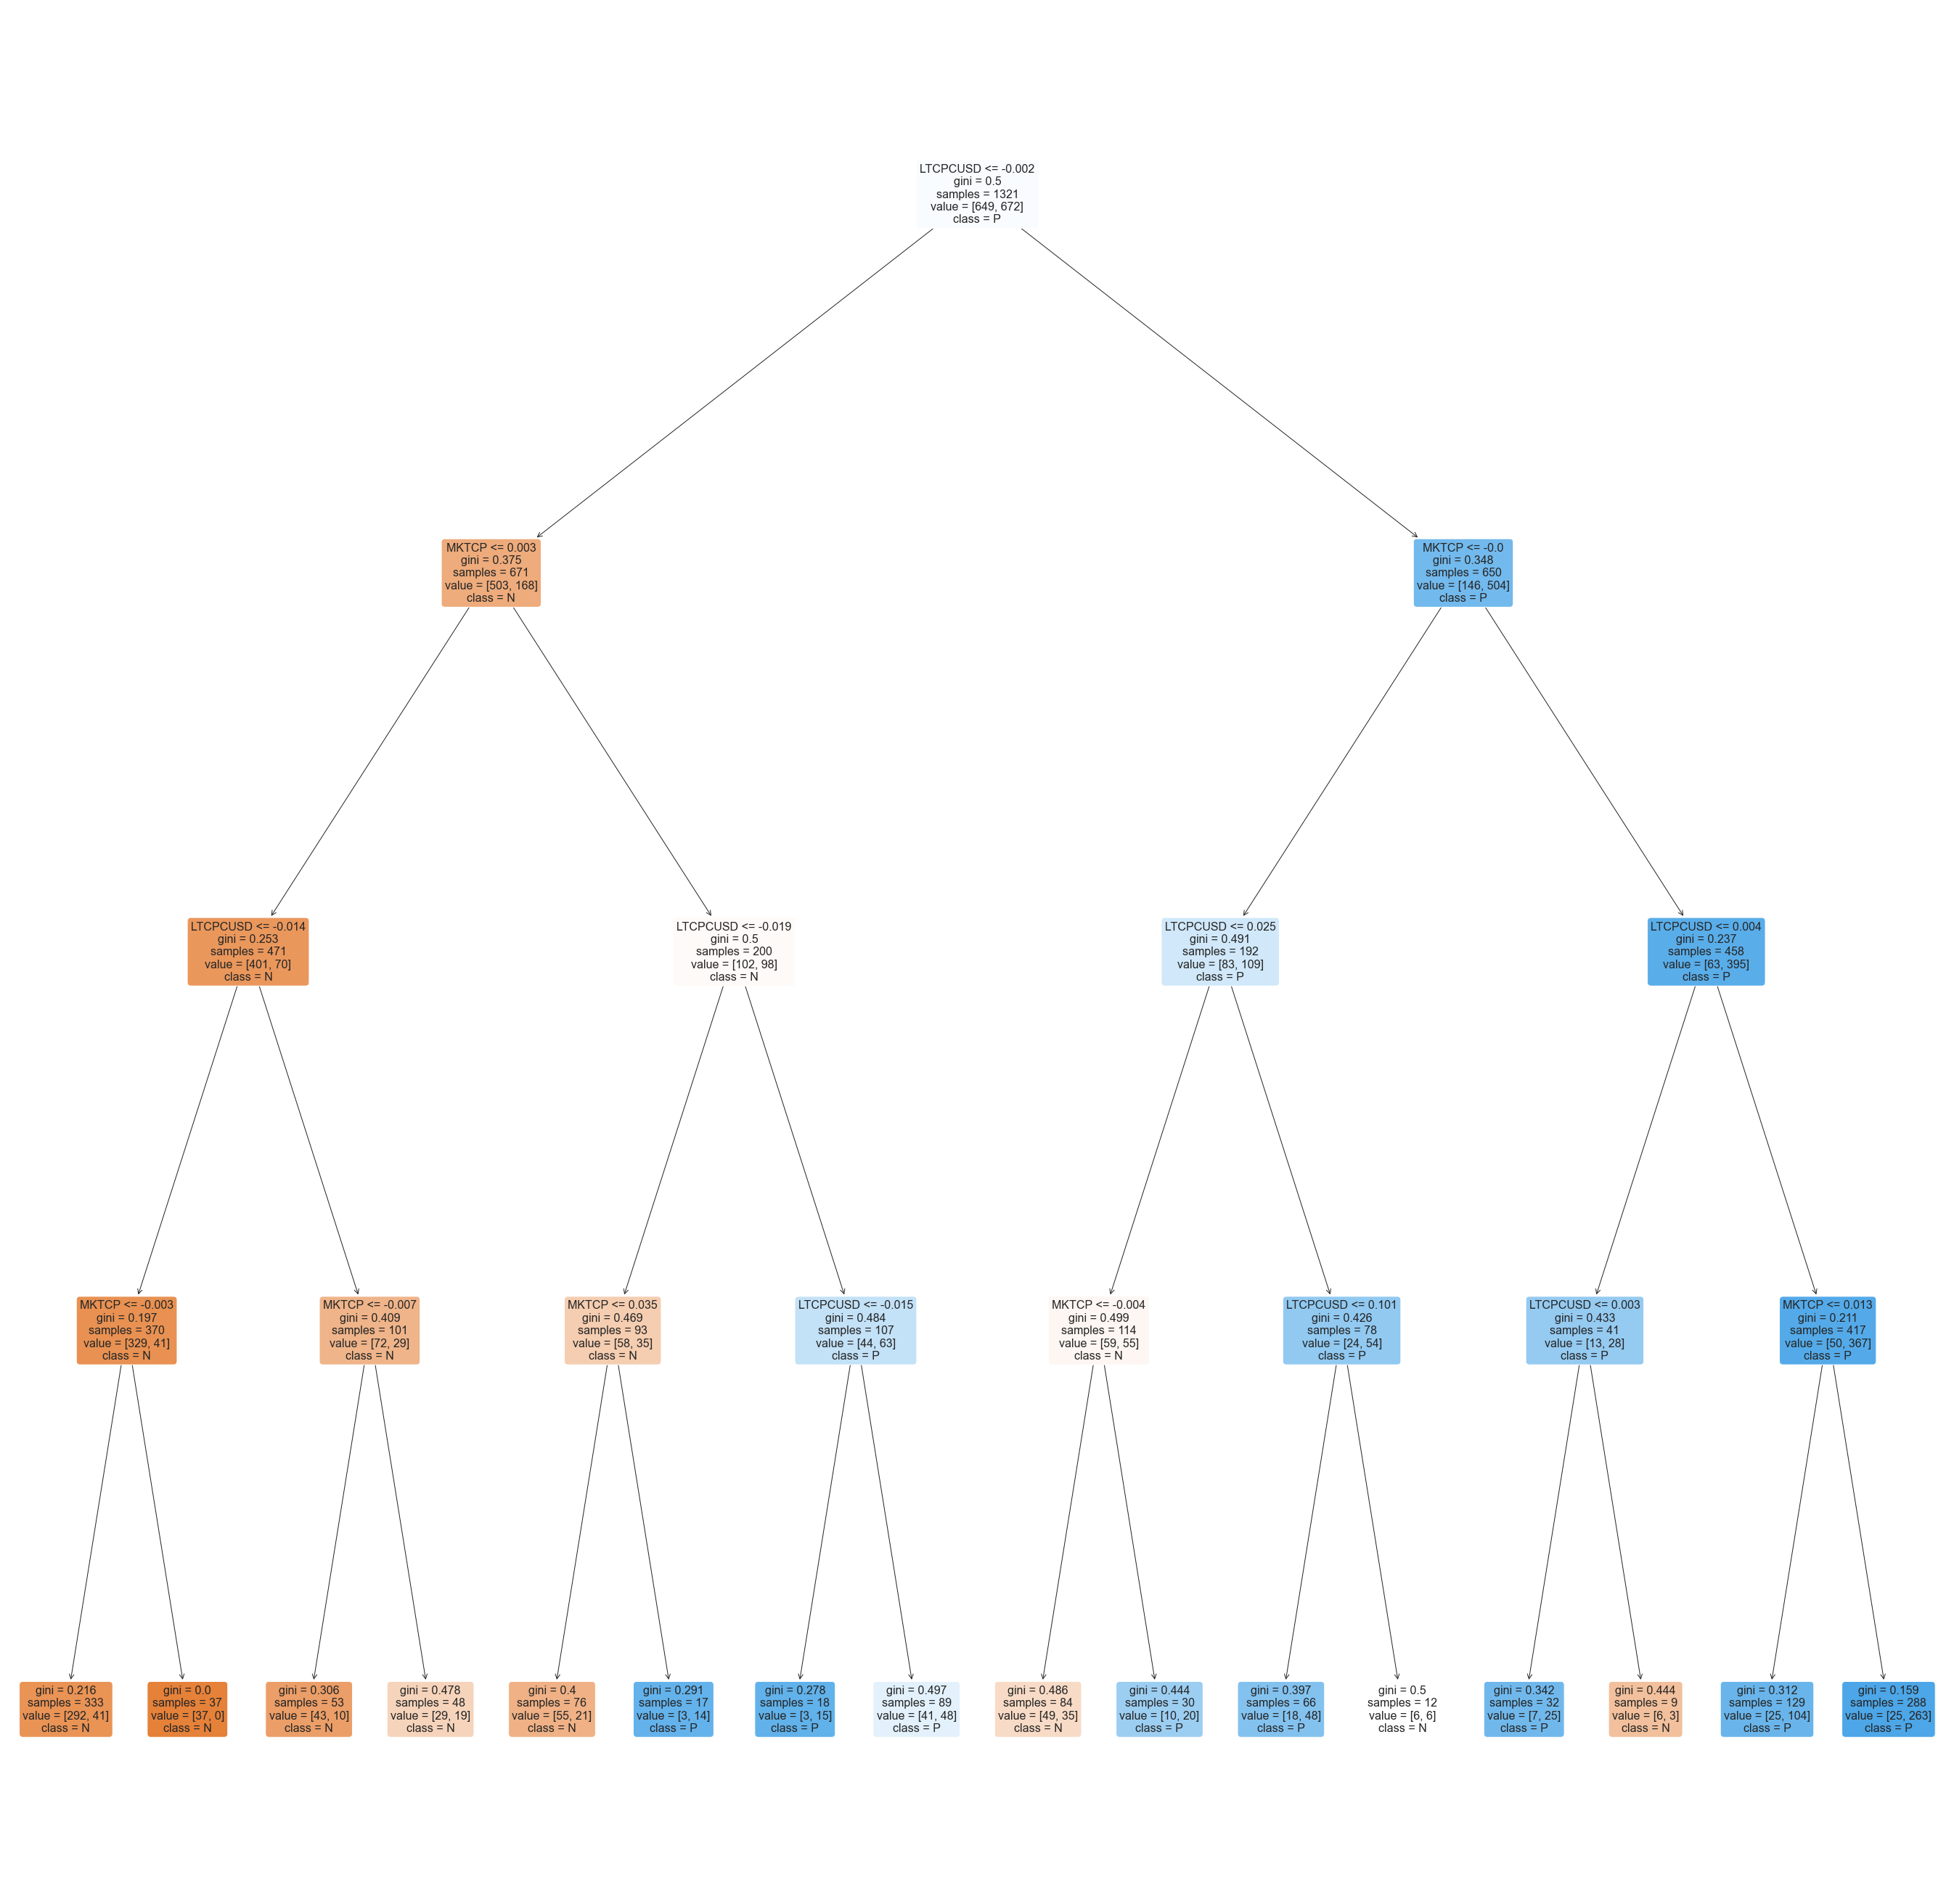

In [8]:
from sklearn import tree
from sklearn.tree import plot_tree
# Decision Tree using Train Data
dectree = tree.DecisionTreeClassifier(max_depth = 4)  # Greater depth seems to give worse test accuracy, setting to nothing to find perfect train acc gives worst test acc
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(48,48))
plt.savefig('tree_high_dpi', dpi=100)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","P"])# CREATING THE TREE

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7978803936411809

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7915407854984894



<AxesSubplot:>

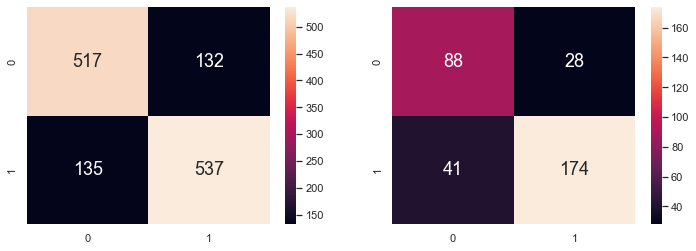

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1]) # 1 = Positive, 0 = Negative, 2 = Zero % change

In [10]:
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


TPR Test :	 0.8093023255813954
TNR Test :	 0.7586206896551724

FPR Test :	 0.2413793103448276
FNR Test :	 0.19069767441860466
